# Name: Tufan Kundu
# Registration no: 24MDT0184
## 28 March, 2025
# Visualization of Different Time Series Models

# White noise process

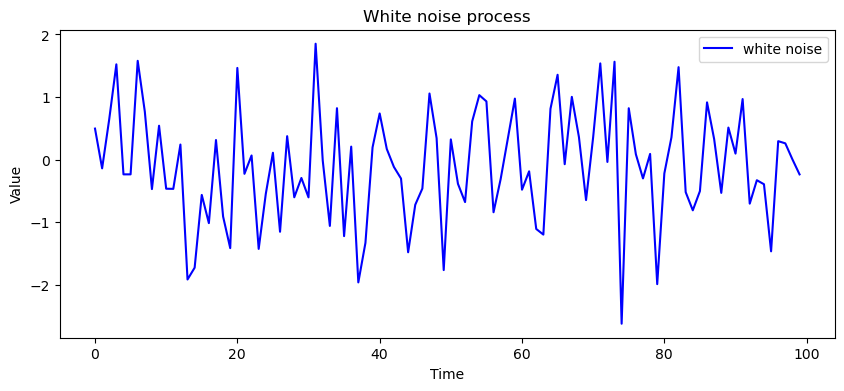

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
white_noise = np.random.normal(loc = 0, scale = 1, size = 100)
# generates 100 dats points from normal distribution with mean 0 and standard␣deviation 1
plt.figure(figsize = (10,4))
plt.plot(white_noise, label = 'white noise', color = 'b')
plt.title("White noise process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Random Walk

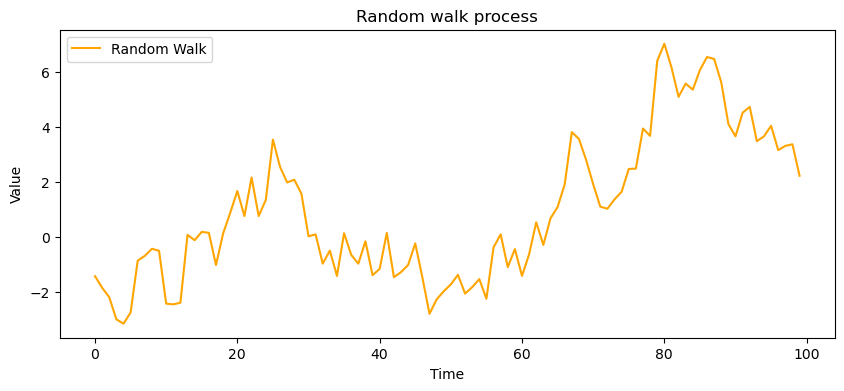

In [3]:
random_walk = np.cumsum(np.random.normal(loc = 0, scale = 1, size = 100))
# np.cumsum computes the cumulative sum, converting white noise into a random␣walk.
# each value is the sum of the previous value plus a new random step
plt.figure(figsize = (10,4))
plt.plot(random_walk, label = 'Random Walk', color = 'orange')
plt.title("Random walk process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

#  Trend process

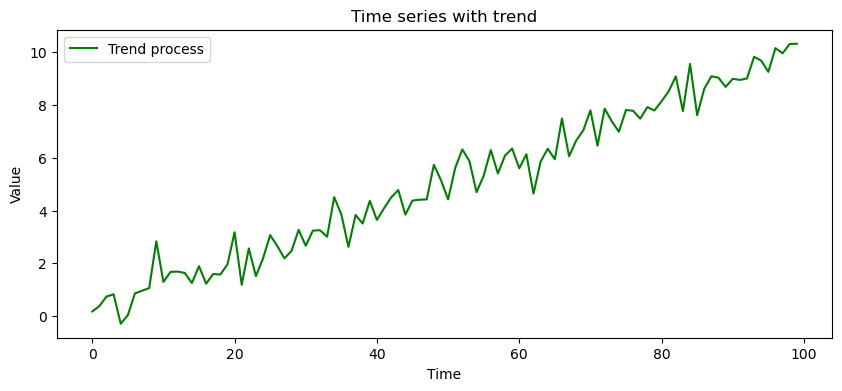

In [ ]:
trend = np.linspace(start = 0, stop = 10, num = 100) + np.random.normal(scale =0.5, size = 100)
plt.figure(figsize = (10,4))
plt.plot(trend, label = 'Trend process', color = 'green')
plt.title("Time series with trend")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

#  Seasonal component

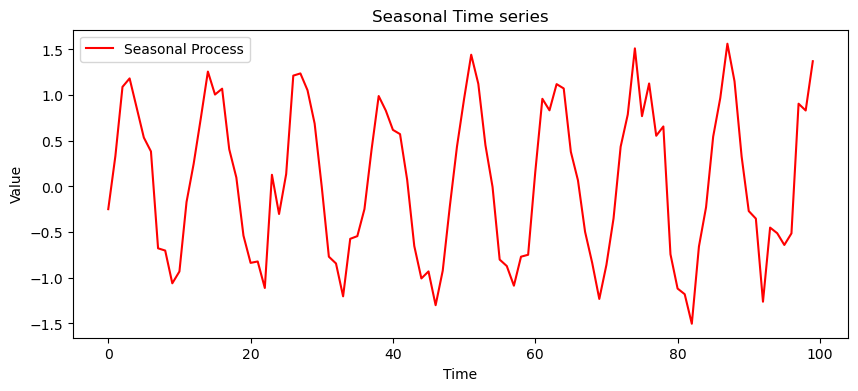

In [ ]:
time = np.arange(100)
seasonal = np.sin(2*np.pi*time/12)+ np.random.normal(scale = 0.3, size = 100)
plt.figure(figsize = (10,4))
plt.plot(seasonal, label = 'Seasonal Process', color = 'red')
plt.title("Seasonal Time series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Moving average

In [6]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import statsmodels.api as sm
 from statsmodels.tsa.stattools import adfuller
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
df_births = pd.read_csv("daily-total-female-births.csv", index_col = 0, parse_dates = True)
df_air_passengers = pd.read_csv("AirPassengers.csv",index_col = 0, parse_dates = True)
# Changing the index to datetime format
df_births.index = pd.to_datetime(df_births.index)
df_air_passengers.index = pd.to_datetime(df_air_passengers.index)
print("First few rows of Birth Data:")
print(df_births.head())
print("\nFirst few rows of Air Passengers Data:")
print(df_air_passengers.head())

First few rows of Birth Data:
            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

First few rows of Air Passengers Data:
            value
date             
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121


In [8]:
# Applying moving average

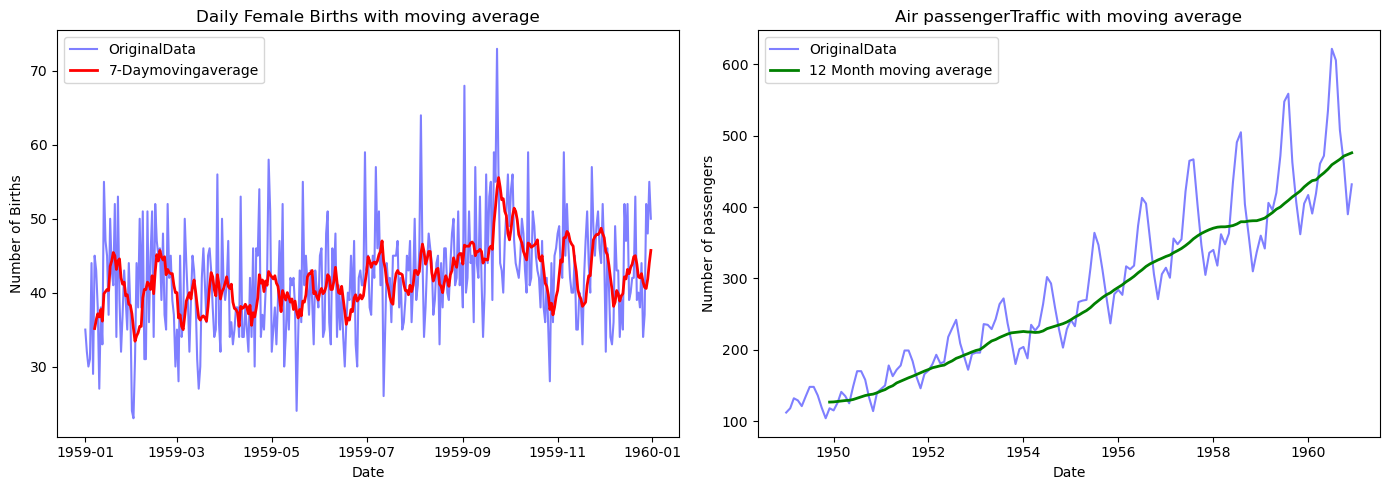

In [11]:
##Movingaveragewith windowof7days
df_births['MA_7'] =df_births.iloc[:,0].rolling(window=7).mean()
df_air_passengers['MA_12']= df_air_passengers.iloc[:,0].rolling(window =12).mean()
plt.figure(figsize= (14,5))
plt.subplot(1,2,1)
plt.plot(df_births.iloc[:,0],label ="OriginalData",color ='blue',alpha =0.5)
plt.plot(df_births['MA_7'],label = "7-Daymovingaverage",color ='red',linewidth = 2)
plt.title("Daily Female Births with moving average")
plt.xlabel("Date")
plt.ylabel("Number of Births")
plt.legend()
plt.subplot(1,2,2)
plt.plot(df_air_passengers.iloc[:,0],label ="OriginalData",color ='blue',alpha = 0.5)
plt.plot(df_air_passengers['MA_12'],label ="12 Month moving average",color='green', linewidth =2)
plt.title("Air passengerTraffic with moving average")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# OLS Trend

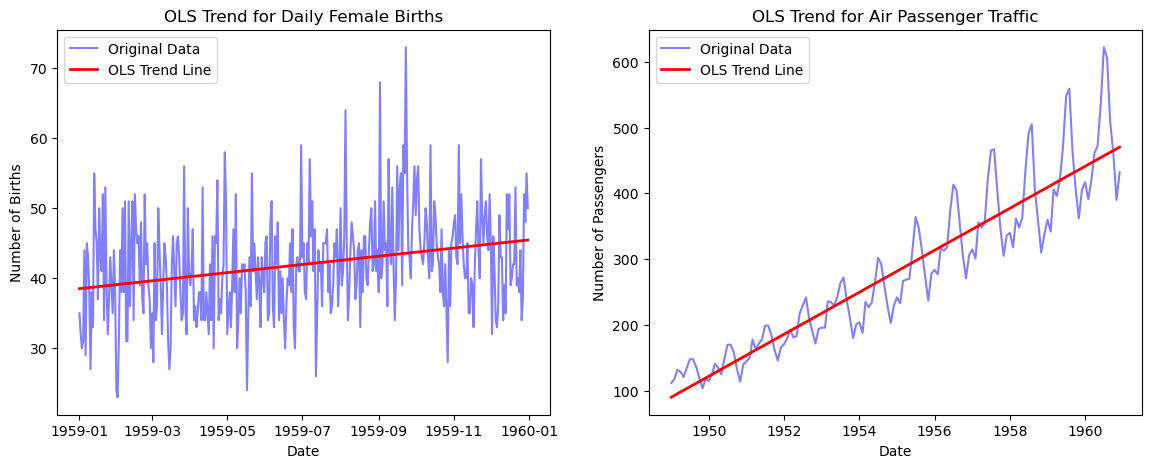

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Add a time index for both datasets
df_births['Time'] = np.arange(len(df_births))
df_air_passengers['Time'] = np.arange(len(df_air_passengers))

# OLS model for daily female births
x_births = sm.add_constant(df_births['Time'])
y_births = df_births.iloc[:, 0]
model_births = sm.OLS(y_births, x_births).fit()
df_births['OLS_Trend'] = model_births.fittedvalues

# OLS model for air passenger traffic
x_air = sm.add_constant(df_air_passengers['Time'])
y_air = df_air_passengers.iloc[:, 0]
model_air = sm.OLS(y_air, x_air).fit()
df_air_passengers['OLS_Trend'] = model_air.fittedvalues

# Plot of original data and OLS trend
plt.figure(figsize=(14, 5))

# Plot for daily birth data
plt.subplot(1, 2, 1)
plt.plot(df_births.iloc[:, 0], label="Original Data", color='blue', alpha=0.5)
plt.plot(df_births['OLS_Trend'], label='OLS Trend Line', color='red', linewidth=2)
plt.title("OLS Trend for Daily Female Births")
plt.xlabel("Date")
plt.ylabel("Number of Births")
plt.legend()

# Plot for air passenger data
plt.subplot(1, 2, 2)
plt.plot(df_air_passengers.iloc[:, 0], label="Original Data", color='blue', alpha=0.5)
plt.plot(df_air_passengers['OLS_Trend'], label='OLS Trend Line', color='red', linewidth=2)
plt.title("OLS Trend for Air Passenger Traffic")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()

# Show the plots
plt.show()
